# EDA PM2.5 dataset from Top Gun Rally's quiz 

This part will explore the insight of PM2.5 trending from Top Gun Rally competition's dataset that was collected from whole competitor.

Top Gun Rally dataset includes PM2.5 value, location of sensor, device id of microcontroller and timestamp. 

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [2]:
sensor_df = pd.read_csv('dataset/tgr_sensor.csv')
sensor_df['day'] = sensor_df.apply(
    lambda row: pd.Timestamp(row['timestamp']).dayofyear, axis=1)
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])

In [3]:
sensor_df.head()

,Unnamed: 0,DevEUI,lat,lng,row_id,sensor,team_id,timestamp,day
0,0,AA00DBCA14EF1401,13.082194,100.918190,-LwbQeapATZOLMfdiNaw,13,1,2019-12-21 14:49:20,355
1,1,AA00DBCA14EF1401,13.082194,100.918190,-LwbS1T0wp_duvhTIWtv,13,1,2019-12-21 14:55:20,355
2,2,AA00DBCA14EF1401,13.082194,100.918190,-LwbSO-4gjvnwY5RWWOL,14,1,2019-12-21 14:56:52,355
3,3,AA00DBCA14EF1401,13.112661,100.937904,-LwbSQXUbD9thOCE86Ic,14,1,2019-12-21 14:57:02,355
4,4,AA00DBCA14EF1401,13.082194,100.918190,-LwbSm3LpnnrN_Y4PQju,12,1,2019-12-21 14:58:35,355


In [4]:
sensor_df['sensor'].hist(figsize=(24,8), bins=100)

In [5]:
sensor_df['sensor'].describe()

count    79325.000000
mean        18.925269
std         20.655906
min          0.000000
25%          6.000000
50%         10.000000
75%         25.000000
max        255.000000
Name: sensor, dtype: float64

# Day Counting

Explore how many day of PM2.5 data was collected from any competitor.

In [9]:
count_day = sensor_df.groupby(['DevEUI']).apply(lambda row: row['day'].drop_duplicates().count())

In [10]:
count_day

DevEUI
AA00DBCA14EF1401    10
AA00DBCA14EF1403    11
AA00DBCA14EF1406    25
AA00DBCA14EF1407    15
AA00DBCA14EF1414     2
AA00DBCA14EF1418    11
AA00DBCA14EF1420    14
AA00DBCA14EF1421    13
AA00DBCA14EF1422    11
AA00DBCA14EF1426    16
AA00DBCA14EF1430    10
AA00DBCA14EF1432    15
AA00DBCA14EF1433    12
dtype: int64

In [11]:
sensor_df[['team_id','DevEUI']].sort_values('DevEUI').drop_duplicates()

,team_id,DevEUI
0,1,AA00DBCA14EF1401
45925,3,AA00DBCA14EF1403
37839,2,AA00DBCA14EF1406
52154,6,AA00DBCA14EF1406
57044,7,AA00DBCA14EF1407
57261,14,AA00DBCA14EF1414
57355,18,AA00DBCA14EF1418
60758,20,AA00DBCA14EF1420
66863,32,AA00DBCA14EF1420
62464,21,AA00DBCA14EF1421


# PM2.5 Trending

Visualize the PM2.5 data of any device and it relationship time.

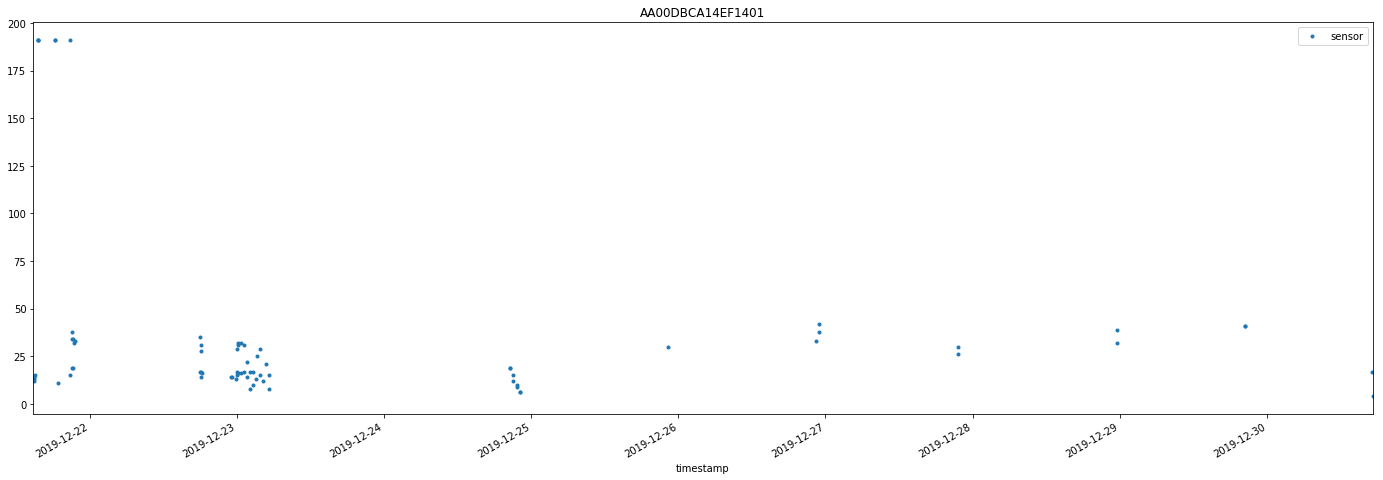

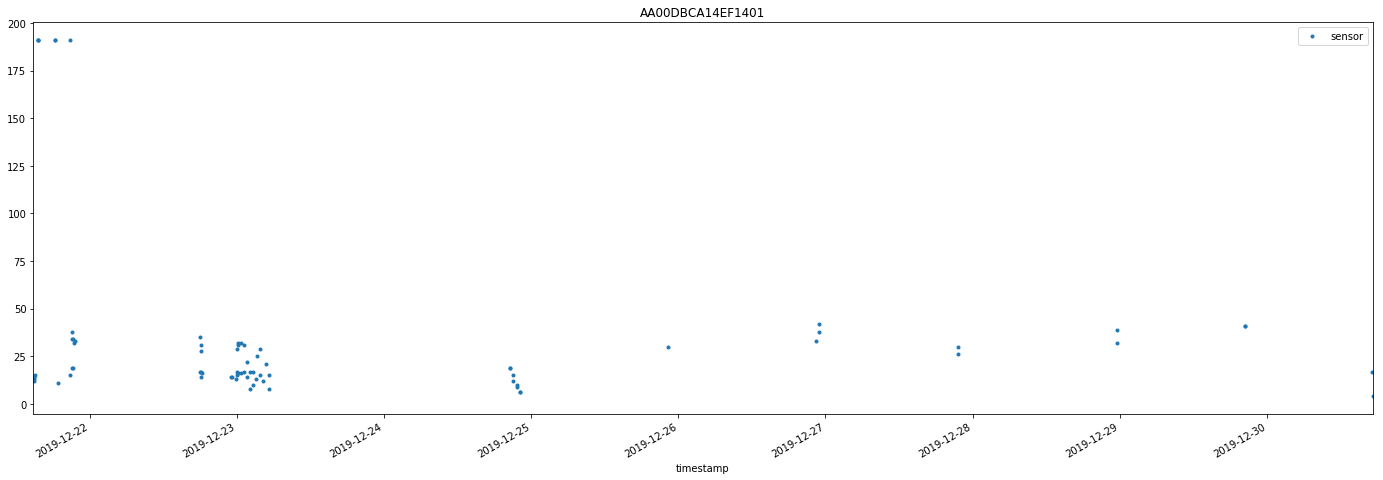

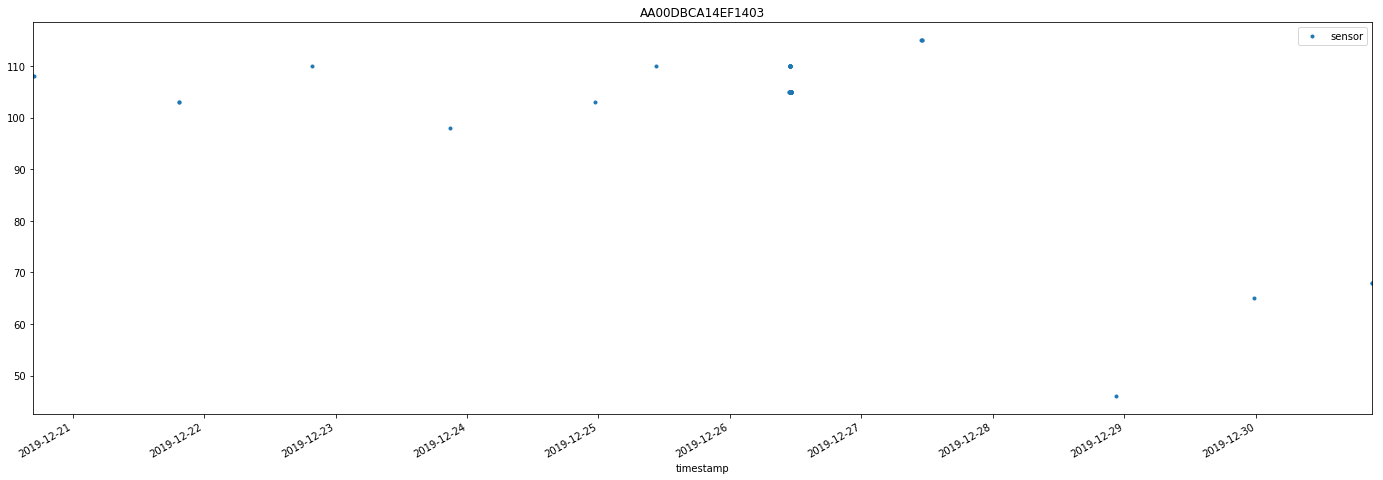

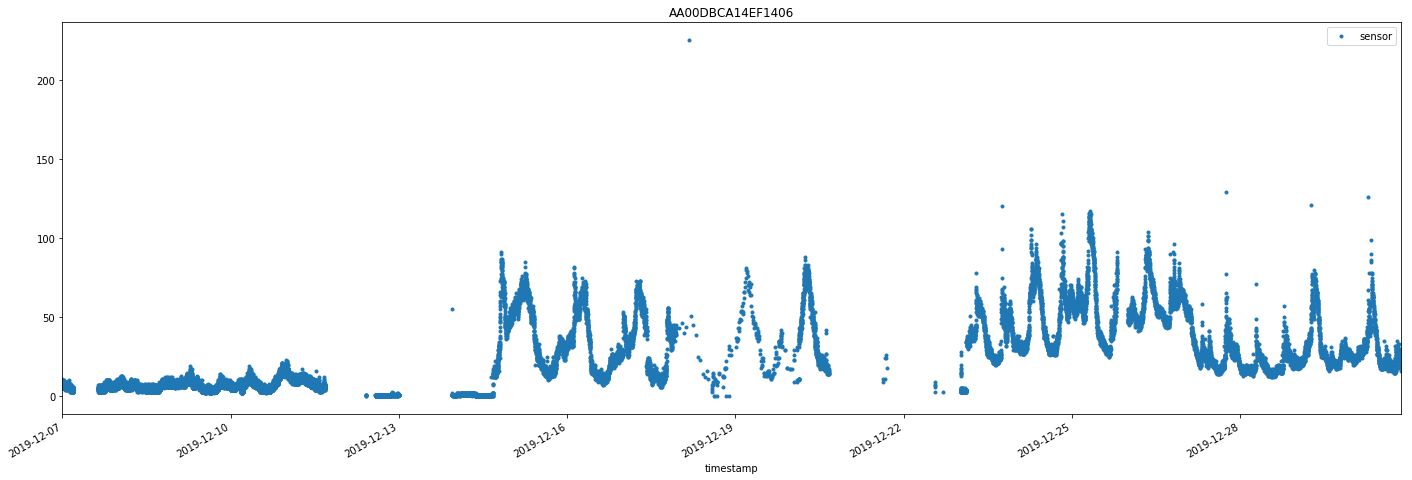

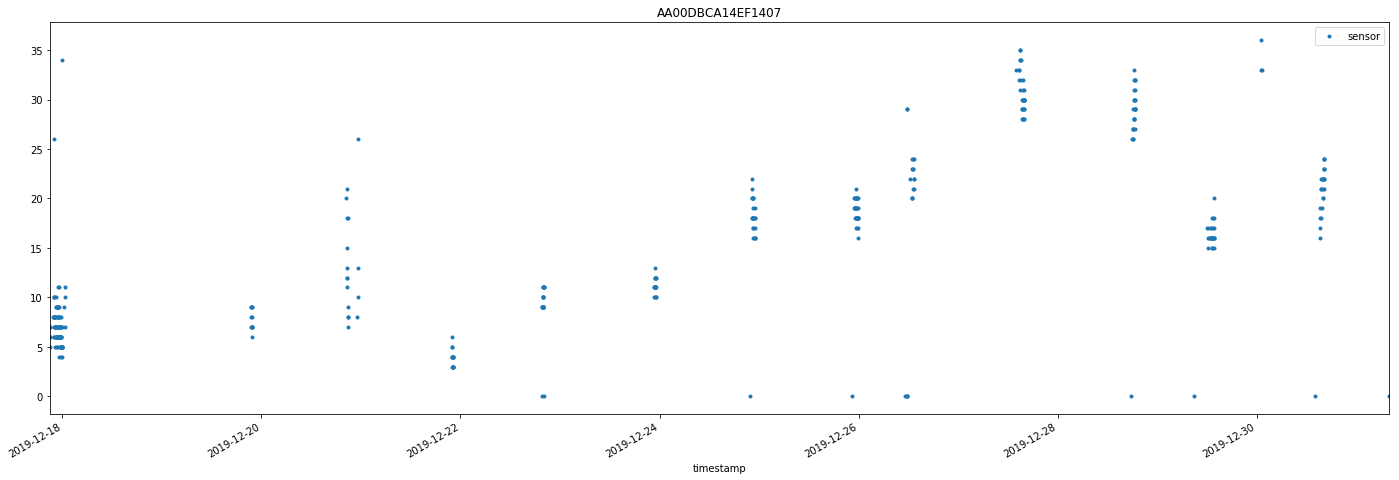

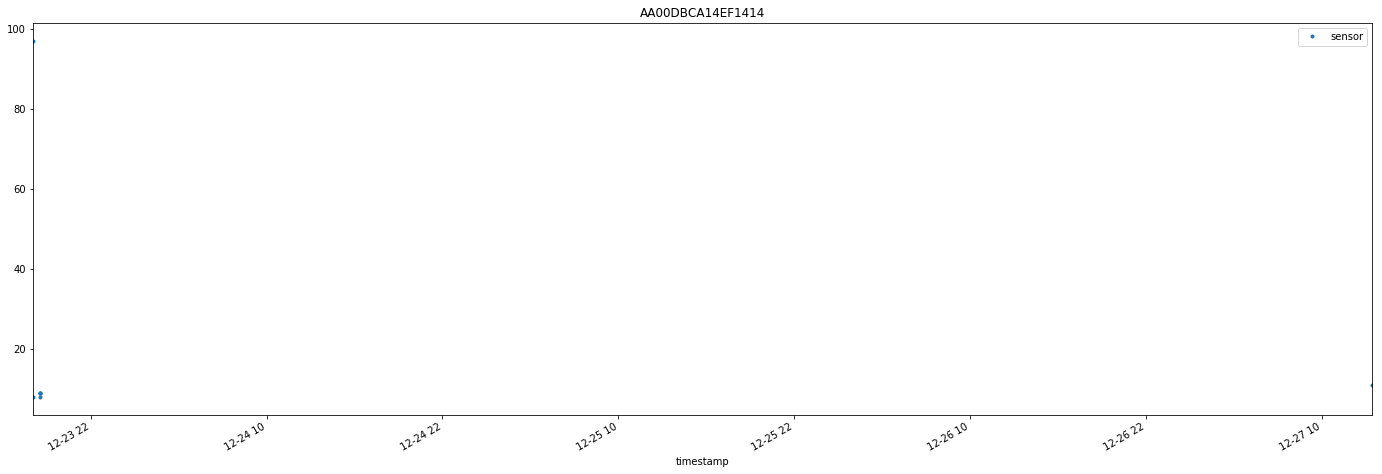

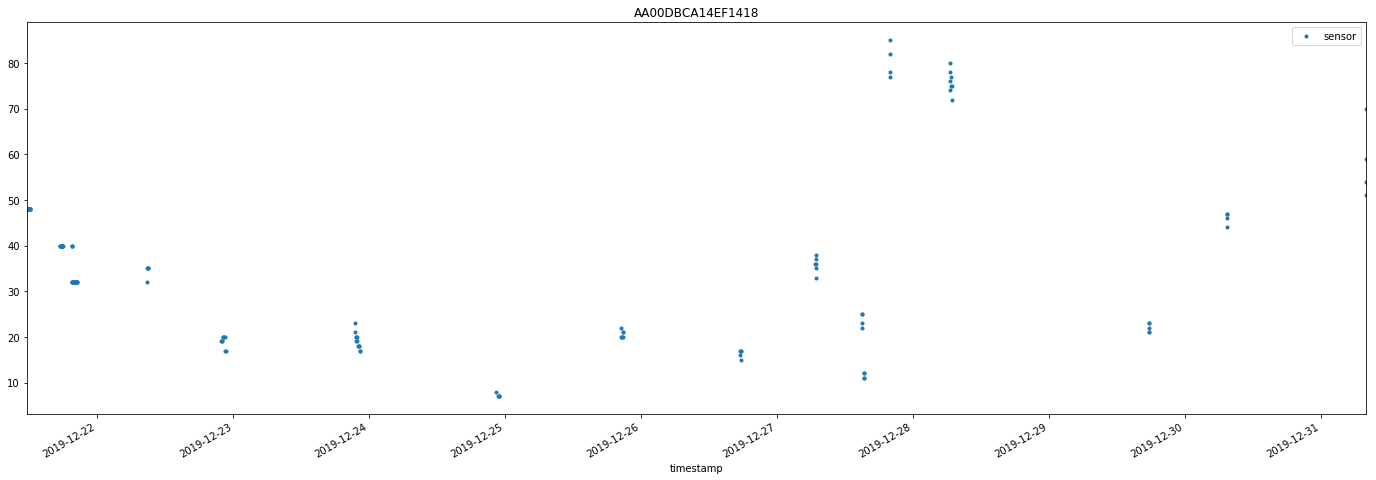

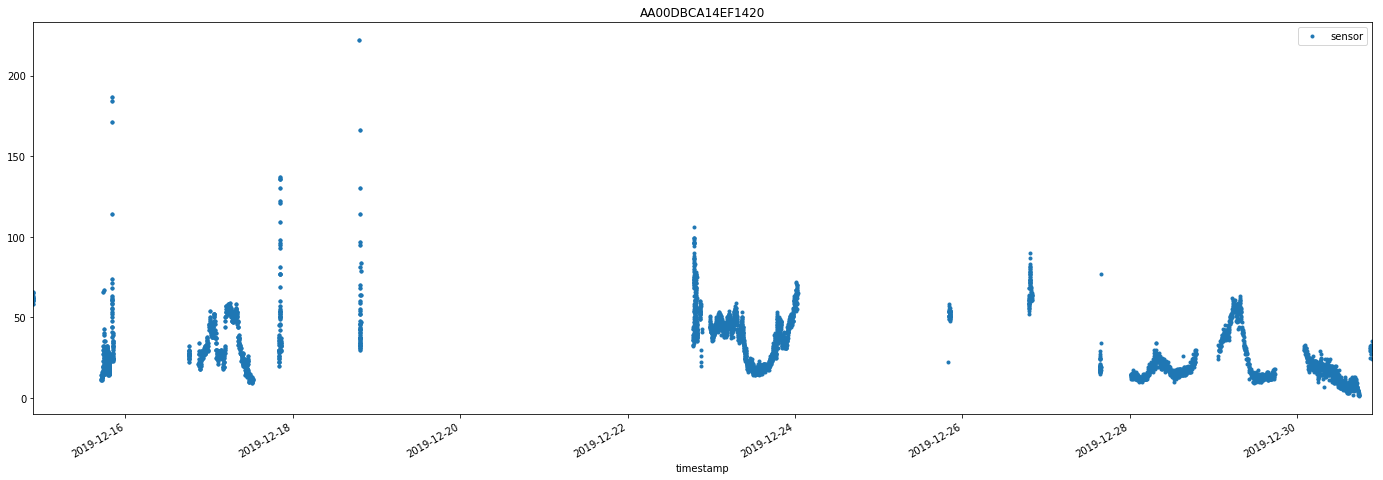

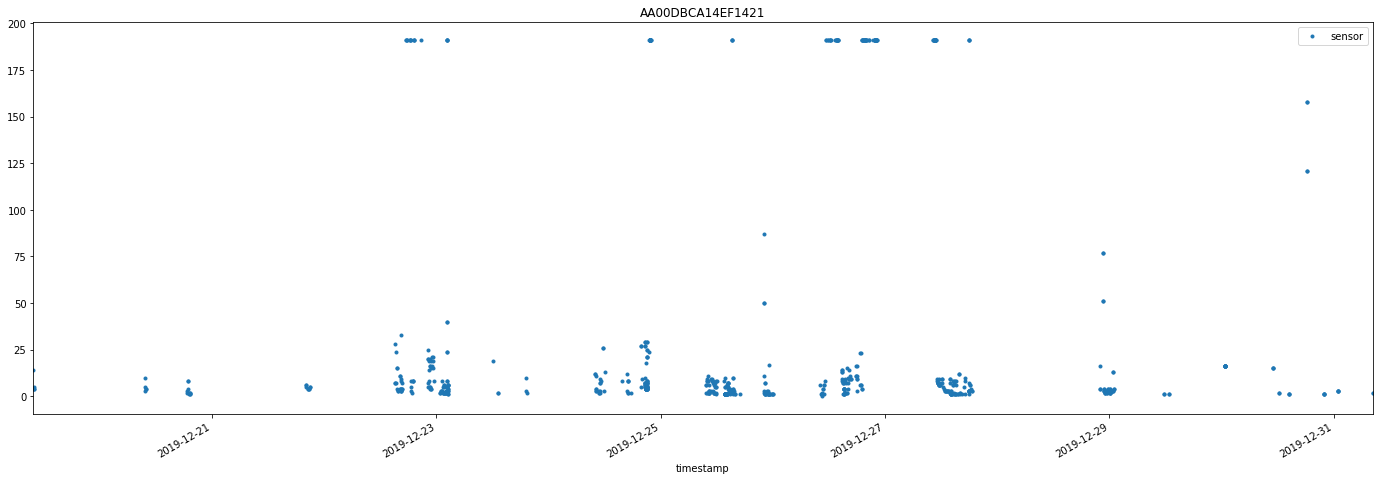

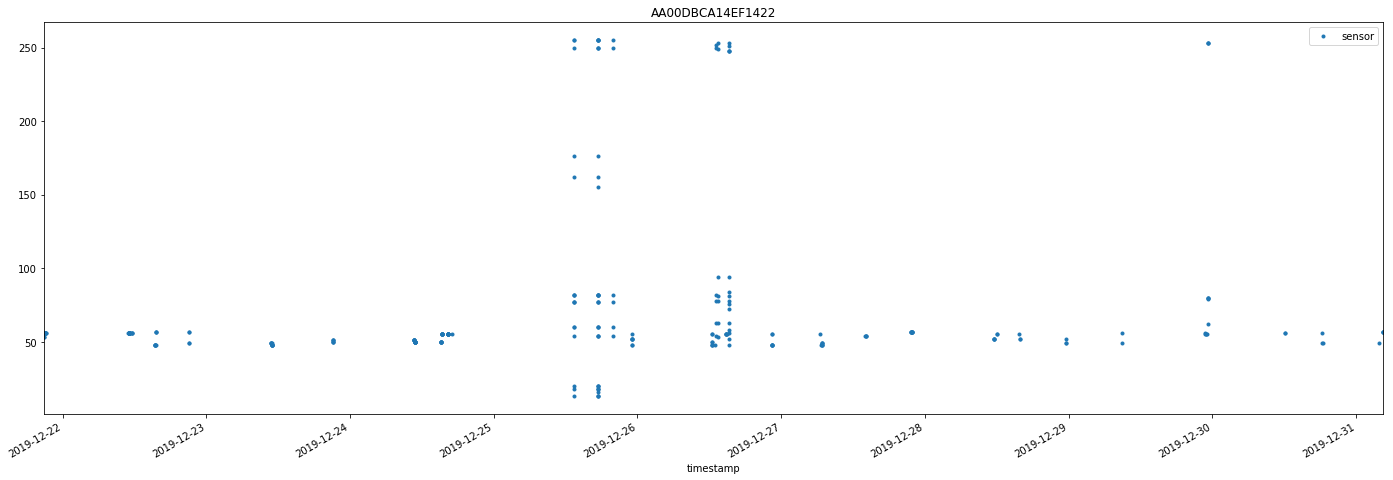

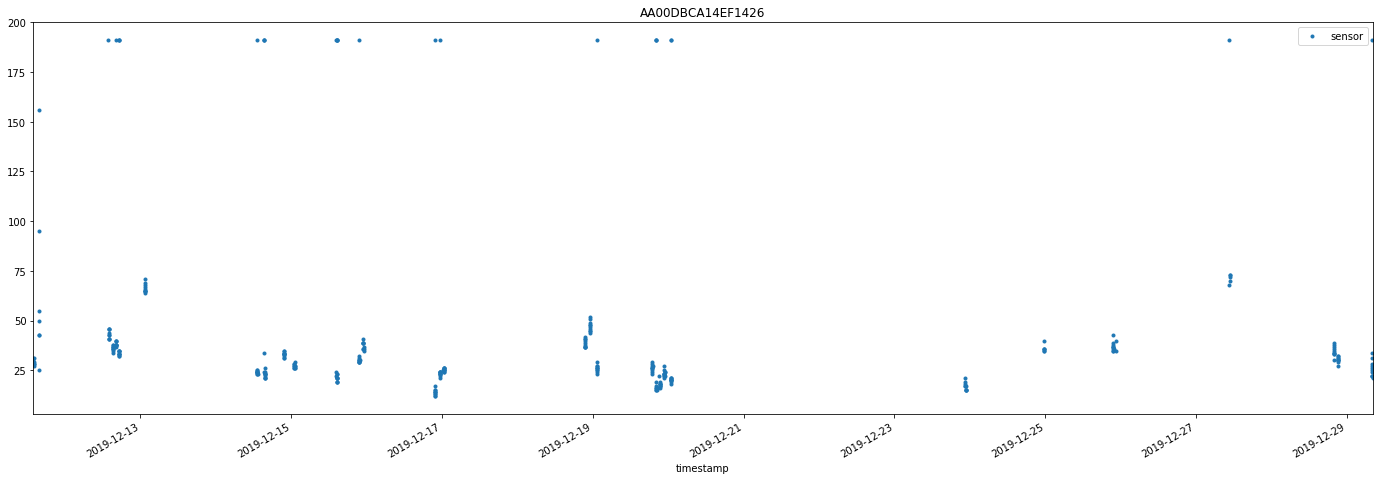

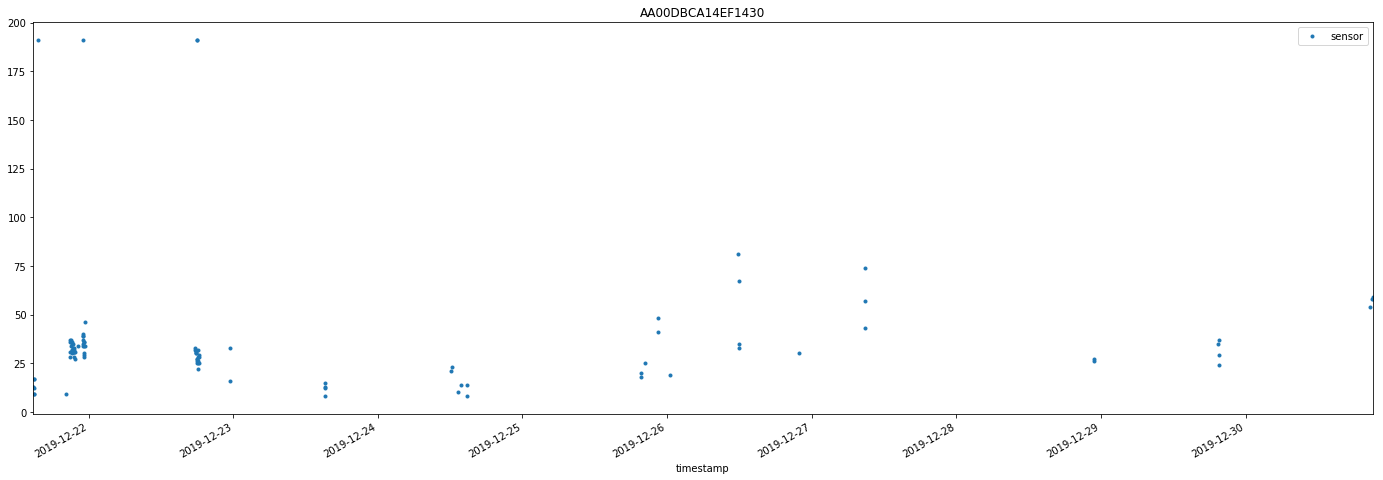

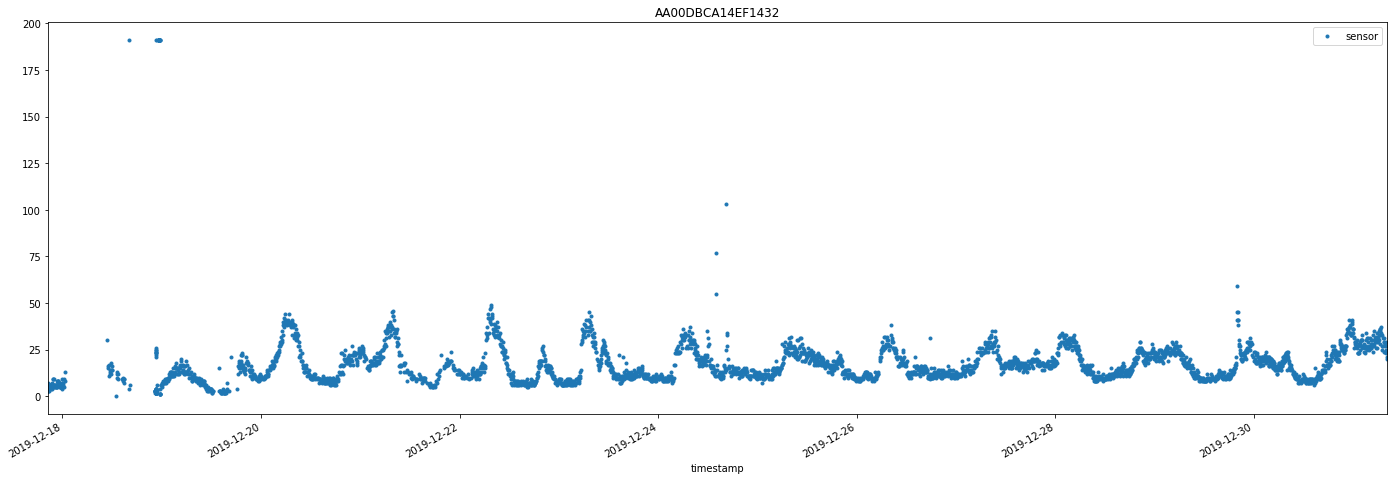

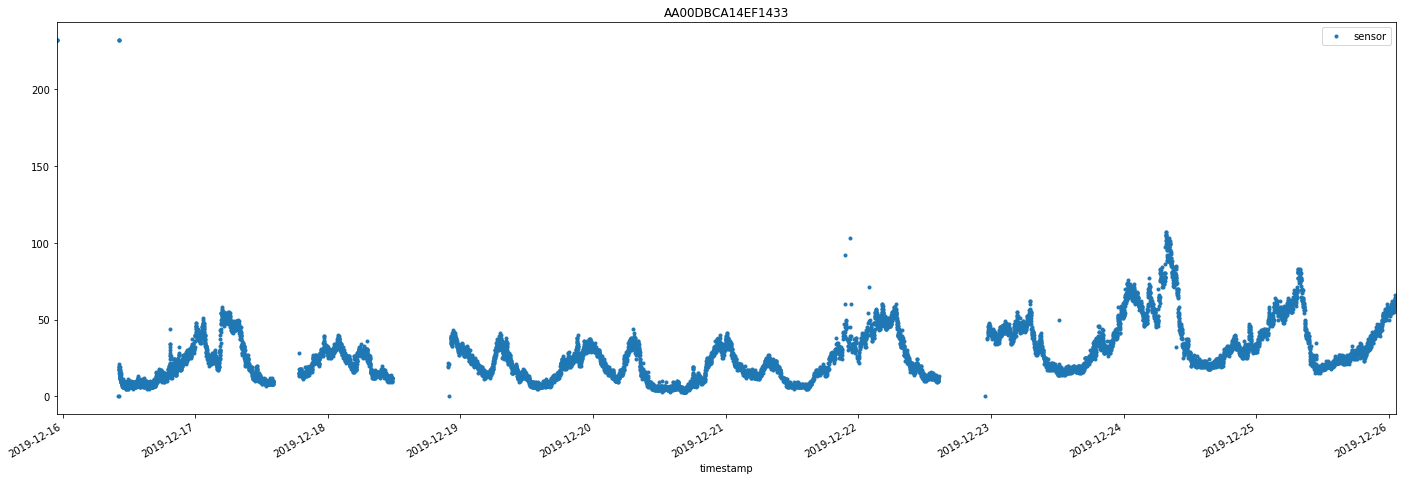

In [12]:
device_sensor = sensor_df.groupby('DevEUI').apply(
    lambda device: device.sort_values('timestamp')[['timestamp', 'sensor']]
    .plot(x='timestamp', y='sensor', style='.', title=device.name, figsize=(24, 8)))

DevEUI
AA00DBCA14EF1401    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1403    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1406    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1407    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1414    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1418    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1420    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1421    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1422    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1426    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1430    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1432    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1433    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

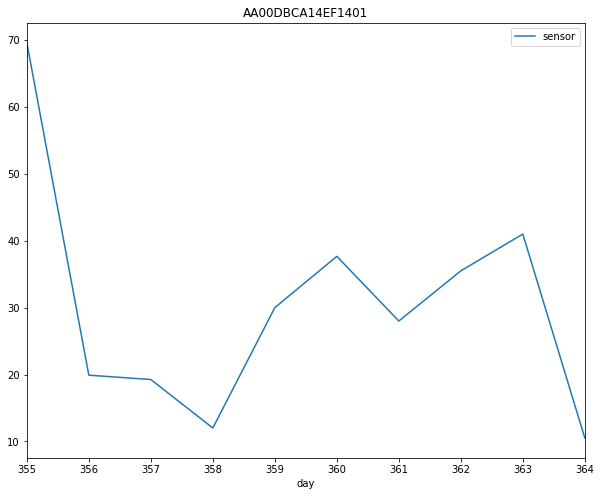

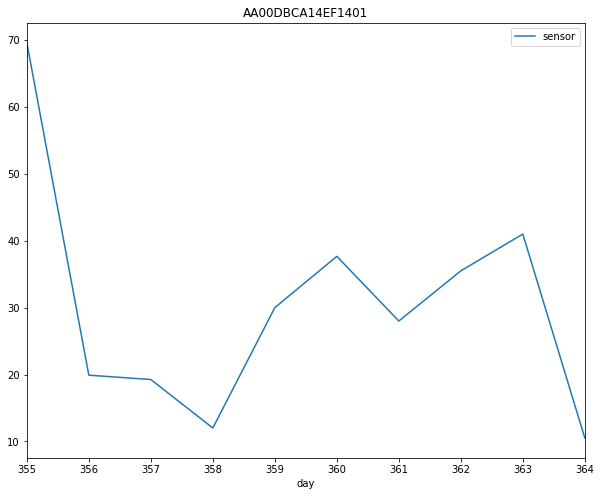

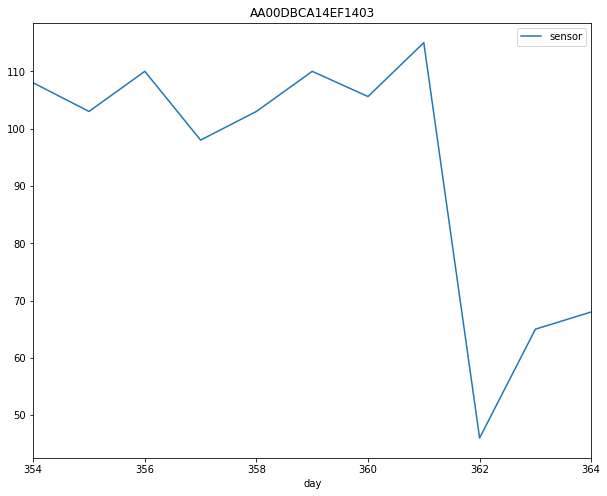

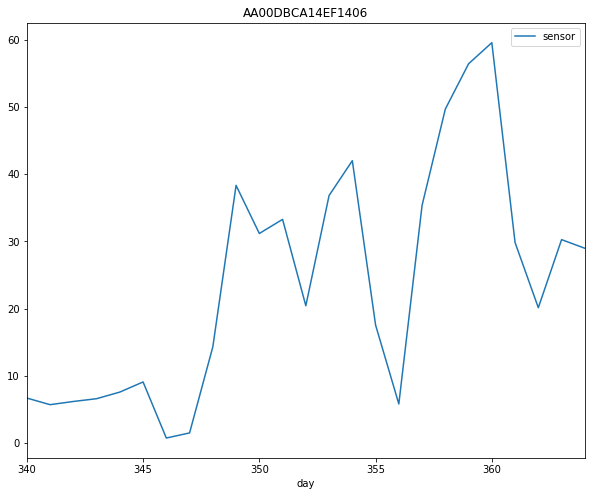

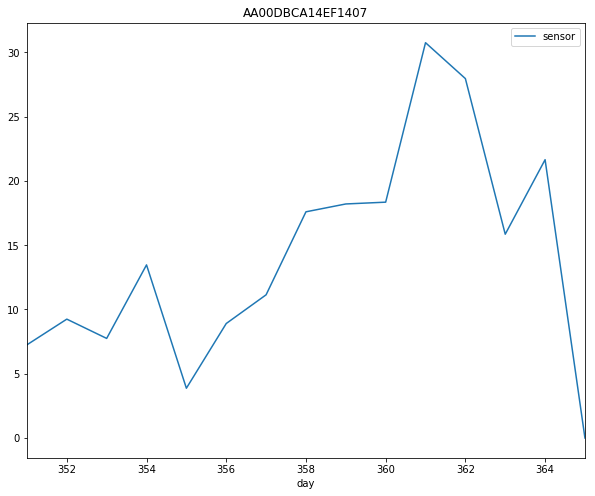

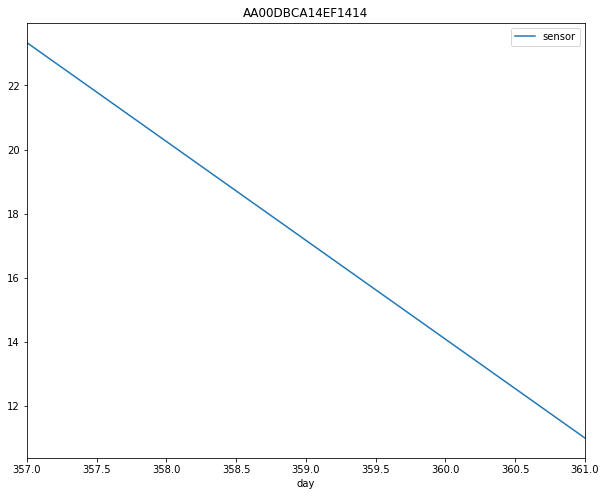

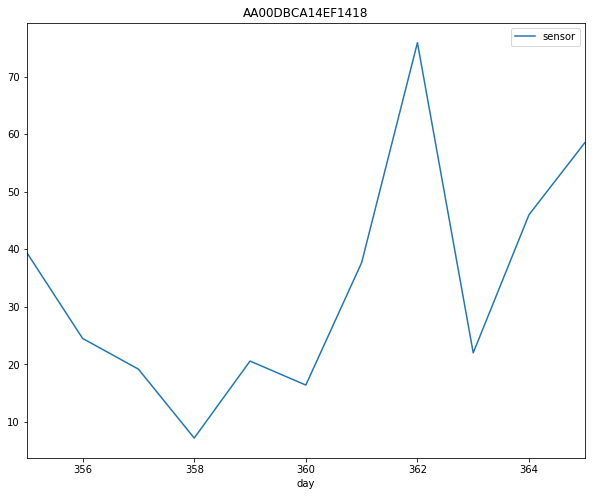

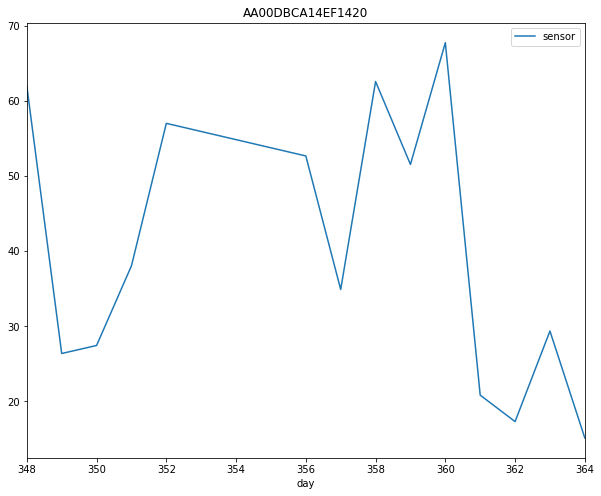

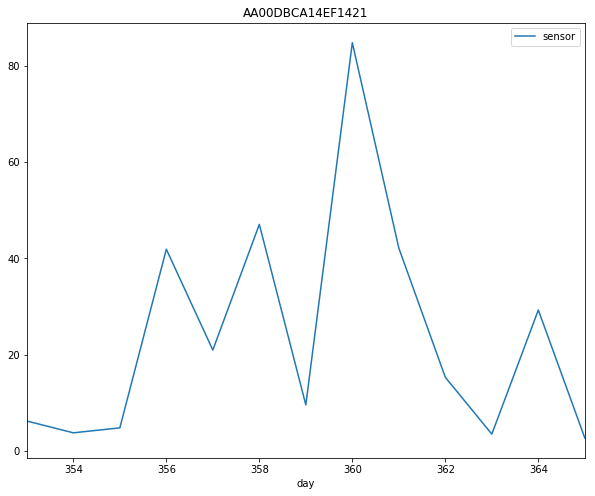

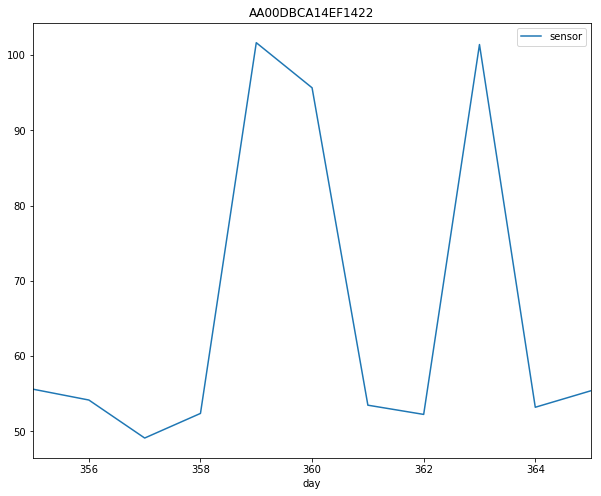

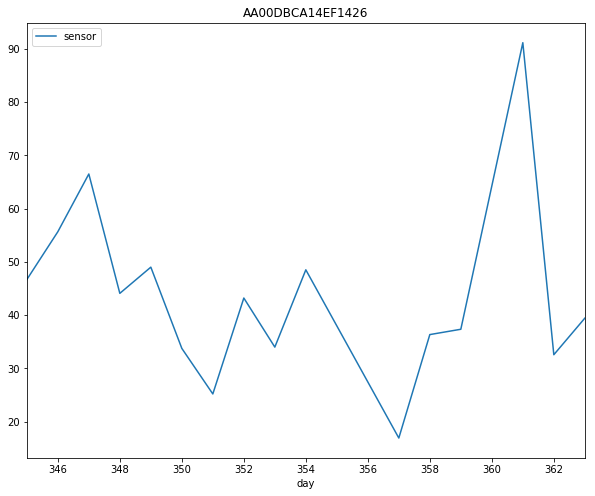

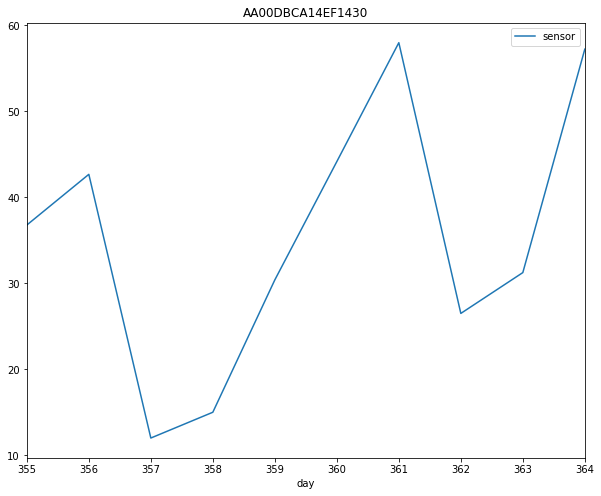

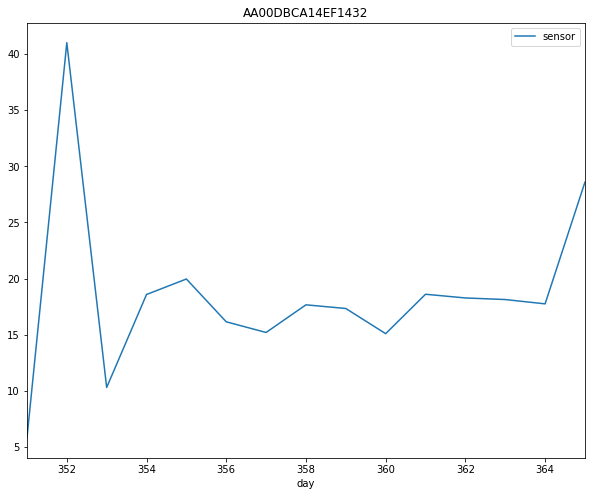

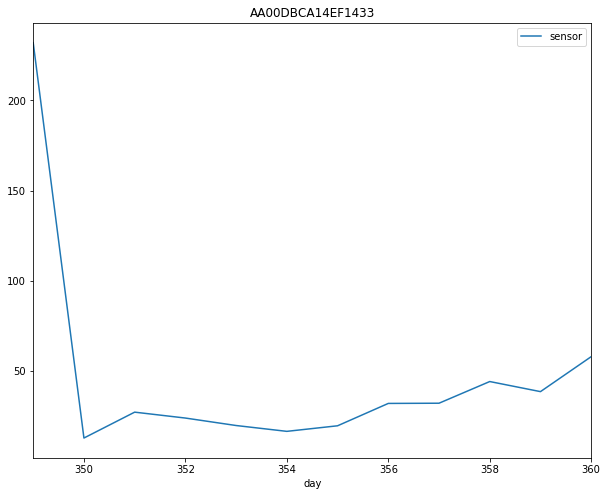

In [13]:
sensor_df.groupby(['DevEUI', 'day']).mean().reset_index().groupby(['DevEUI']).apply(
    lambda device: device.sort_values('day')[['day', 'sensor']]
    .plot(x='day', y='sensor', kind='line', title=device.name, figsize=(10, 8)))

# Conclusion

From above, we found dataset has a lot of missing data, has small number of data (around ~20 days) and especially have no standard of frequency of PM2.5. Therefore, these dataset has no capability for analysis.